# 따릉이 데이터를 활용한 데이터 분석

각 날짜의 1시간 전의 기상상황을 가지고 1시간 후의 따릉이 대여수를 예측하기

## 1. 라이브러리 및 데이터

In [3]:
import pandas as pd

In [4]:
# 모델 학습 파일
train_data = pd.read_csv("/Users/kimmandoo/Downloads/따릉이/train.csv")
train_data

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [5]:
# 모델 시험지 파일
test_data = pd.read_csv("/Users/kimmandoo/Downloads/따릉이/test.csv")
test_data

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0
...,...,...,...,...,...,...,...,...,...,...
710,2148,1,24.6,0.0,2.4,60.0,1745.0,NaN,NaN,NaN
711,2149,1,18.1,0.0,1.0,55.0,2000.0,NaN,NaN,NaN
712,2165,9,23.3,0.0,2.3,66.0,1789.0,0.020,17.0,15.0
713,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032,40.0,26.0


In [6]:
# 답안지 파일
sub_data = pd.read_csv("/Users/kimmandoo/Downloads/따릉이/submission.csv")
sub_data

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN
...,...,...
710,2148,NaN
711,2149,NaN
712,2165,NaN
713,2166,NaN


## 2. 탐색적 데이터 분석

In [7]:
train_data.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


모든 열의 데이터가 수치형 데이터임

- id : 날짜와 시간별 id
- hour_bef_temperature : 1시간 전 기온
- hour_bef_precipitation : 1시간 전 비 정보, 비가 오지 않았으면 0, 비가 오면 1
- hour_bef_windspeed : 1시간 전 풍속(평균)
- hour_bef_humidity : 1시간 전 습도
- hour_bef_visibility : 1시간 전 시정, 시계(특정 기상에 따른 가시성을 의미)
- hour_bef_ozone : 1시간 전 오존
- hour_bef_pm10 : 1시간 전 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
- hour_bef_pm2.5 : 1시간 전 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지
- count : 시간에 따른 따릉이 대여 수

In [8]:
test_data.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


count 주어져 있지 않음.
데이콘 플랫폼에 올라와 있음.

In [9]:
sub_data.head()

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN


In [10]:
# pd.DataFrame.shape : 데이터 프레임의 행의 개수와 열의 개수가 저장되어 있는 속성
print(train_data.shape)
print(test_data.shape)
print(sub_data.shape)

(1459, 11)
(715, 10)
(715, 2)


In [11]:
# pd.DataFrame.info() : 데이터셋의 column별 정보를 알려주는 함수, 비어있지 않은 값을 몇 개인지?, column의 type은 무엇인지?
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [13]:
# pd.DataFrame.describe() : 숫자형(int, float) column들의 기술 통계량(평균, 표준편차, 사분위수 등등)을 보여주는 함수 
train_data.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [14]:
test_data.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
count,715.000000,715.000000,714.000000,714.000000,714.000000,714.000000,714.000000,680.000000,678.000000,679.000000
mean,1056.854545,11.472727,23.263305,0.051821,2.388515,56.668067,1359.494398,0.041196,36.930678,24.939617
std,625.574471,6.928427,4.039645,0.221820,1.171270,19.661880,614.171870,0.020656,12.641503,10.075857
min,0.000000,0.000000,14.600000,0.000000,0.000000,16.000000,126.000000,0.003000,9.000000,7.000000
25%,507.000000,5.500000,20.300000,0.000000,1.500000,42.000000,807.250000,0.027000,28.000000,17.000000
50%,1046.000000,11.000000,22.900000,0.000000,2.300000,55.000000,1489.000000,0.039000,35.000000,24.000000
75%,1616.500000,17.000000,26.375000,0.000000,3.275000,73.750000,2000.000000,0.052250,45.000000,31.000000
max,2177.000000,23.000000,33.800000,1.000000,5.900000,100.000000,2000.000000,0.138000,94.000000,69.000000


In [15]:
# 시간별 따릉이 대여수 알아보기
# pd.DataFrame.groupby() : 집단에 대한 통계량 확인
train_data.groupby('hour').mean()['count']

hour
0      71.766667
1      47.606557
2      31.409836
3      21.377049
4      13.524590
5      13.114754
6      24.557377
7      62.360656
8     136.688525
9      93.540984
10     78.803279
11     88.327869
12    111.901639
13    120.050000
14    134.590164
15    152.967213
16    169.100000
17    187.133333
18    262.163934
19    201.606557
20    164.868852
21    168.816667
22    148.245902
23    103.852459
Name: count, dtype: float64

<AxesSubplot: xlabel='hour'>

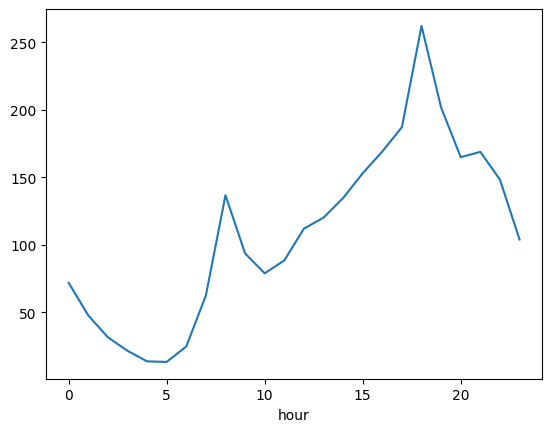

In [16]:
train_data.groupby('hour').mean()['count'].plot()

In [17]:
# pd.DataFrame.corr() : correlation coefficient의 줄임말
train_data.corr()


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


<AxesSubplot: >

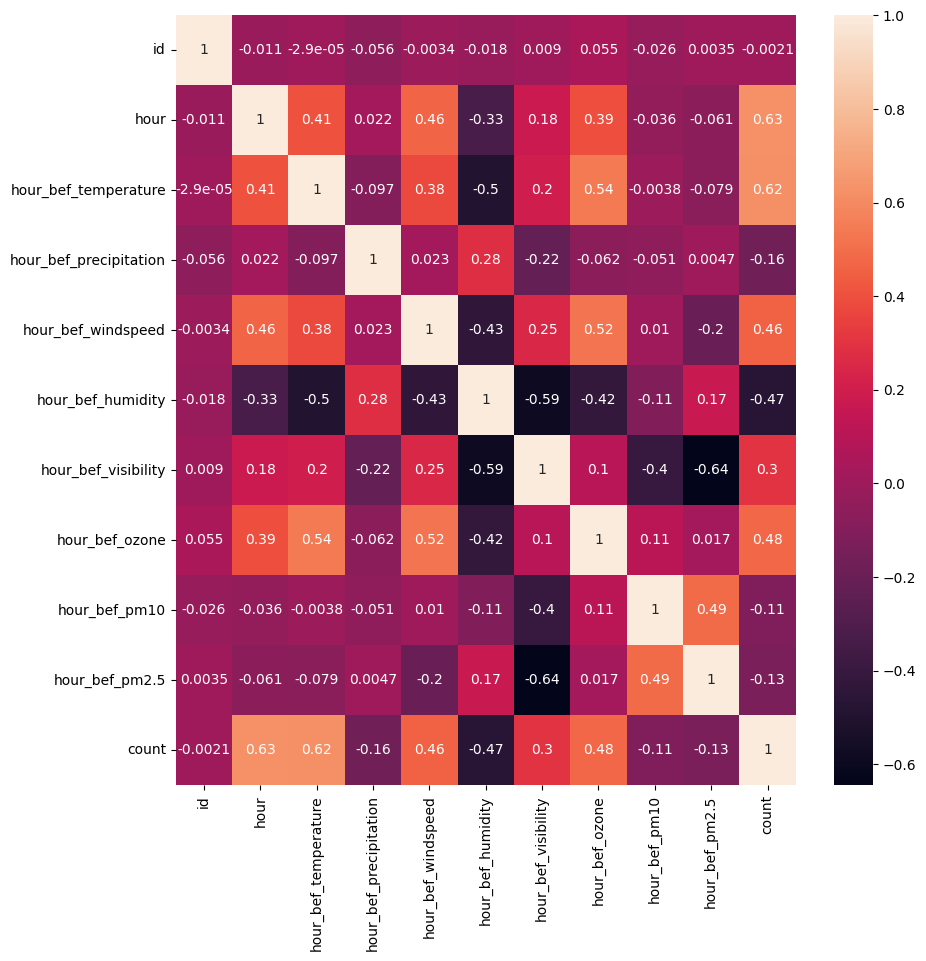

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(train_data.corr(), annot=True)

- 상관계수가 높은 컬럼만 가지고 분석 및 학습 시키는 것이 정확한 결과를 얻을 수 있음
- 따라서 hour, hour_bef_temperature, hour_bef_windspeed를 사용할 예정

## 3. 데이터 전처리

In [19]:
# pd.Series.isna() : 결측치 여부를 확인해주는 함수, 결측치이면 True, 아니면 False
train_data.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [20]:
# 1시간 전 온도 열의 결측치 위치 확인
train_data[train_data['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [21]:
# 시간별 평균 구하기
train_data.groupby('hour').mean()['hour_bef_temperature']

hour
0     14.788136
1     14.155738
2     13.747541
3     13.357377
4     13.001639
5     12.673770
6     12.377049
7     12.191803
8     12.600000
9     14.318033
10    16.242623
11    18.019672
12    19.457377
13    20.648333
14    21.234426
15    21.744262
16    22.015000
17    21.603333
18    20.926667
19    19.704918
20    18.191803
21    16.978333
22    16.063934
23    15.418033
Name: hour_bef_temperature, dtype: float64

In [22]:
# pd.DataFrame.fillna() : 결측치를 채우고자 하는 column과 결측치를 대신하여 넣고자 하는 값을 명시해주어야 함, inplace 속성을 True로 하면 원래 데이터셋에 저장 가능
train_data['hour_bef_temperature'].fillna({934: 14.788136, 1035: 20.926667}, inplace=True)

In [23]:
train_data.loc[[934, 1035], :]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,14.788136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [24]:
# 1시간 전 풍속 열의 결측치 위치 확인
train_data[train_data['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.600000,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.100000,0.0,NaN,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.000000,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.300000,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.500000,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0
934,1420,0,14.788136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.400000,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.000000,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0


In [25]:
# 시간별 평균 구하기
train_data.groupby('hour').mean()['hour_bef_windspeed']

hour
0     1.965517
1     1.836667
2     1.633333
3     1.620000
4     1.409836
5     1.296721
6     1.331148
7     1.262295
8     1.632787
9     1.829508
10    2.122951
11    2.485246
12    2.766667
13    3.281356
14    3.522951
15    3.768852
16    3.820000
17    3.801667
18    3.838333
19    3.595082
20    3.278333
21    2.755000
22    2.498361
23    2.195082
Name: hour_bef_windspeed, dtype: float64

In [26]:
# 결측치 채우기
train_data['hour_bef_windspeed'].fillna({18: 3.281356, 244: 1.836667, 260: 1.620000, 
                                         376: 1.965517, 780: 3.278333, 934: 1.965517,
                                        1035: 3.838333, 1138: 2.766667, 1229: 1.633333}, inplace=True)

In [27]:
train_data.loc[[18, 244, 260, 376, 780, 934, 1035, 1138, 1229], :]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.600000,0.0,3.281356,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.100000,0.0,1.836667,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.000000,0.0,1.620000,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.300000,0.0,1.965517,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.500000,0.0,3.278333,31.0,2000.0,0.058,39.0,18.0,181.0
934,1420,0,14.788136,NaN,1.965517,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,3.838333,NaN,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.400000,0.0,2.766667,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.000000,0.0,1.633333,52.0,2000.0,0.044,37.0,20.0,20.0


In [28]:
# 1시간 전 온도 열의 결측치 위치 확인
test_data[test_data['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# 시간별 평균 구하기
train_data.groupby('hour').mean()['hour_bef_temperature']

hour
0     14.788136
1     14.155738
2     13.747541
3     13.357377
4     13.001639
5     12.673770
6     12.377049
7     12.191803
8     12.600000
9     14.318033
10    16.242623
11    18.019672
12    19.457377
13    20.648333
14    21.234426
15    21.744262
16    22.015000
17    21.603333
18    20.926667
19    19.704918
20    18.191803
21    16.978333
22    16.063934
23    15.418033
Name: hour_bef_temperature, dtype: float64

In [30]:
# 결측치 채우기
test_data['hour_bef_temperature'].fillna(19.704918, inplace=True)

In [31]:
# 1시간 전 풍속 열의 결측치 위치 확인
test_data[test_data['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,19.704918,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# 시간별 평균 구하기
train_data.groupby('hour').mean()['hour_bef_windspeed']

hour
0     1.965517
1     1.836667
2     1.633333
3     1.620000
4     1.409836
5     1.296721
6     1.331148
7     1.262295
8     1.632787
9     1.829508
10    2.122951
11    2.485246
12    2.766667
13    3.281356
14    3.522951
15    3.768852
16    3.820000
17    3.801667
18    3.838333
19    3.595082
20    3.278333
21    2.755000
22    2.498361
23    2.195082
Name: hour_bef_windspeed, dtype: float64

In [33]:
# 결측치 채우기
test_data['hour_bef_windspeed'].fillna(3.595082, inplace=True)

In [34]:
# 시간별 평균 구하고 결측값 채우는 함수
def fillna(column):
    null_hour = train_data.loc[train_data[column].isna(), 'hour'].values
    null_idx = train_data.loc[train_data[column].isna(), 'hour'].index
    for i in range(len(null_hour)):
        new_val = train_data.groupby('hour').mean()[column][null_hour[i]]
        train_data[column].fillna({null_idx[i]: new_val}, inplace=True)

In [35]:
fillna('hour_bef_temperature')
fillna('hour_bef_windspeed')
fillna('hour_bef_humidity')
fillna('hour_bef_visibility')
fillna('hour_bef_ozone')
fillna('hour_bef_pm10')
fillna('hour_bef_pm2.5')

In [37]:
train_data.isna().sum()

id                         0
hour                       0
hour_bef_temperature       0
hour_bef_precipitation     2
hour_bef_windspeed         0
hour_bef_humidity          0
hour_bef_visibility        0
hour_bef_ozone            61
hour_bef_pm10             61
hour_bef_pm2.5            61
count                      0
dtype: int64

- 'hour'이 1인 'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5'의 평균값이 NaN이라서 61개의 데이터가 전처리 되지 않은 상태
- 해결 방안 추후 논의

## 4. 피처 엔지니어링 & 모델 구축

In [61]:
features = ['hour', 'hour_bef_temperature', "hour_bef_windspeed"]
X_train = train_data[features]
y_train = train_data['count']
X_test = test_data[features]

In [62]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1459, 3)
(1459,)
(715, 3)


### RandomForest 속성
- n_estmators : 질문을 묻고자 하는 나무의 개수
- n_jobs : 사용하고자 하는 cpu의 개수(많을수록 빠름, -1 지정 시 가지고 있는 모든 cpu 사용)
- max_depth : 모델의 과대 적합을 막는데 사용하는 속성


In [67]:
# 데이터에 적합한 모델을 만들기 위해 튜닝
from sklearn.ensemble import RandomForestRegressor
model100 = RandomForestRegressor(n_estimators=100, random_state=0)
model100_5 = RandomForestRegressor(n_estimators=100, max_depth = 5, random_state=0)
model200 = RandomForestRegressor(n_estimators=200)

In [74]:
model300 = RandomForestRegressor(n_estimators=300)
model400 = RandomForestRegressor(n_estimators=400)
model500 = RandomForestRegressor(n_estimators=500)

In [80]:
model400_2 = RandomForestRegressor(n_estimators=400, random_state=0)
model400_3 = RandomForestRegressor(n_estimators=400, random_state=0, n_jobs=-1)

In [85]:
model400_4 = RandomForestRegressor(n_estimators=400, max_depth = 10)
model400_5 = RandomForestRegressor(n_estimators=400, n_jobs=-1)

In [68]:
model100.fit(X_train, y_train)
model100_5.fit(X_train, y_train)
model200.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [75]:
model300.fit(X_train, y_train)
model400.fit(X_train, y_train)
model500.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [81]:
model400_2.fit(X_train, y_train)
model400_3.fit(X_train, y_train)

RandomForestRegressor(n_estimators=400, n_jobs=-1, random_state=0)

In [86]:
model400_4.fit(X_train, y_train)
model400_5.fit(X_train, y_train)

RandomForestRegressor(n_estimators=400, n_jobs=-1)

In [69]:
ypred1 = model100.predict(X_test)
ypred2 = model100_5.predict(X_test)
ypred3 = model200.predict(X_test)

In [76]:
ypred4 = model300.predict(X_test)
ypred5 = model400.predict(X_test)
ypred6 = model500.predict(X_test)

In [82]:
ypred7 = model400_2.predict(X_test)
ypred8 = model400_3.predict(X_test)

In [87]:
ypred9 = model400_4.predict(X_test)
ypred10 = model400_5.predict(X_test)

In [71]:
sub_data['count'] = ypred1
sub_data.to_csv('model100.csv', index = False)

In [72]:
sub_data['count'] = ypred2
sub_data.to_csv('model100_5.csv', index = False)

In [73]:
sub_data['count'] = ypred3
sub_data.to_csv('model200.csv', index = False)

In [77]:
sub_data['count'] = ypred4
sub_data.to_csv('model300.csv', index = False)

In [78]:
sub_data['count'] = ypred5
sub_data.to_csv('model400.csv', index = False)

In [79]:
sub_data['count'] = ypred6
sub_data.to_csv('model500.csv', index = False)

In [83]:
sub_data['count'] = ypred7
sub_data.to_csv('model400_2.csv', index = False)

In [88]:
sub_data['count'] = ypred8
sub_data.to_csv('model400_3.csv', index = False)

In [89]:
sub_data['count'] = ypred9
sub_data.to_csv('model400_4.csv', index = False)

In [90]:
sub_data['count'] = ypred10
sub_data.to_csv('model400_5.csv', index = False)

- 점수는 rmse 값이므로 숫자가 적은 것이 성능 좋은 것
- 튜닝 반복하여 최적의 값 찾기
- n_estimators를 400으로 하고 다른 속성을 변경하지 않은 모델의 학습결과의 rmse가 가장 낮게 측정됨